<a href="https://colab.research.google.com/github/harshavardhansannithi/ARDS-using-Machine-learning/blob/main/KNN_vs_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset (replace with your actual data)
data = pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")

# Separate features and target variable
X = data.drop("LUNG_RECRUITMENT", axis=1)
y = data["LUNG_RECRUITMENT"]

from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Assuming X is your feature matrix
# Identify and encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Now, you can proceed with feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled is now your scaled feature matrix



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN Model
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Experiment with different k values
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Decision Tree Model
dt_clf = DecisionTreeClassifier(max_depth=5)  # Experiment with hyperparameters
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and y_pred_knn are your true labels and predicted labels for KNN
print("KNN:")
print(f"Precision: {precision_score(y_test, y_pred_knn, pos_label='YES')}")
print(f"Recall: {recall_score(y_test, y_pred_knn, pos_label='YES')}")
print(f"F1-score: {f1_score(y_test, y_pred_knn, pos_label='YES')}")
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
print(knn_confusion_matrix )

#Accuracy
score_knn = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")


print("\nDecision Tree:")
print(f"Precision: {precision_score(y_test, y_pred_dt,pos_label='YES')}")
print(f"Recall: {recall_score(y_test, y_pred_dt,pos_label='YES')}")
print(f"F1-score: {f1_score(y_test, y_pred_dt,pos_label='YES')}")

#Accuracy
score_dt = round(accuracy_score(y_test, y_pred_dt)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_dt)+" %")

# Hyperparameter tuning and other comparisons (optional)
# - Experiment with different k values for KNN and hyperparameters for Decision Tree (max_depth, min_samples_split, etc.).
# - Use cross-validation for more robust evaluation.
# - Consider additional metrics like AUC-ROC, confusion matrix, or interpretability measures.



KNN:
Precision: 0.9651162790697675
Recall: 0.9651162790697675
F1-score: 0.9651162790697675
[[ 4  3]
 [ 3 83]]
The accuracy score achieved using KNN is: 93.55 %

Decision Tree:
Precision: 0.9876543209876543
Recall: 0.9302325581395349
F1-score: 0.9580838323353293
The accuracy score achieved using KNN is: 92.47 %


In [15]:
scores = [score_dt,score_knn]
algorithms = ["Decision Tree","K-Nearest Neighbors"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Decision Tree is: 92.47 %
The accuracy score achieved using K-Nearest Neighbors is: 93.55 %


In [16]:
import seaborn as sns

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

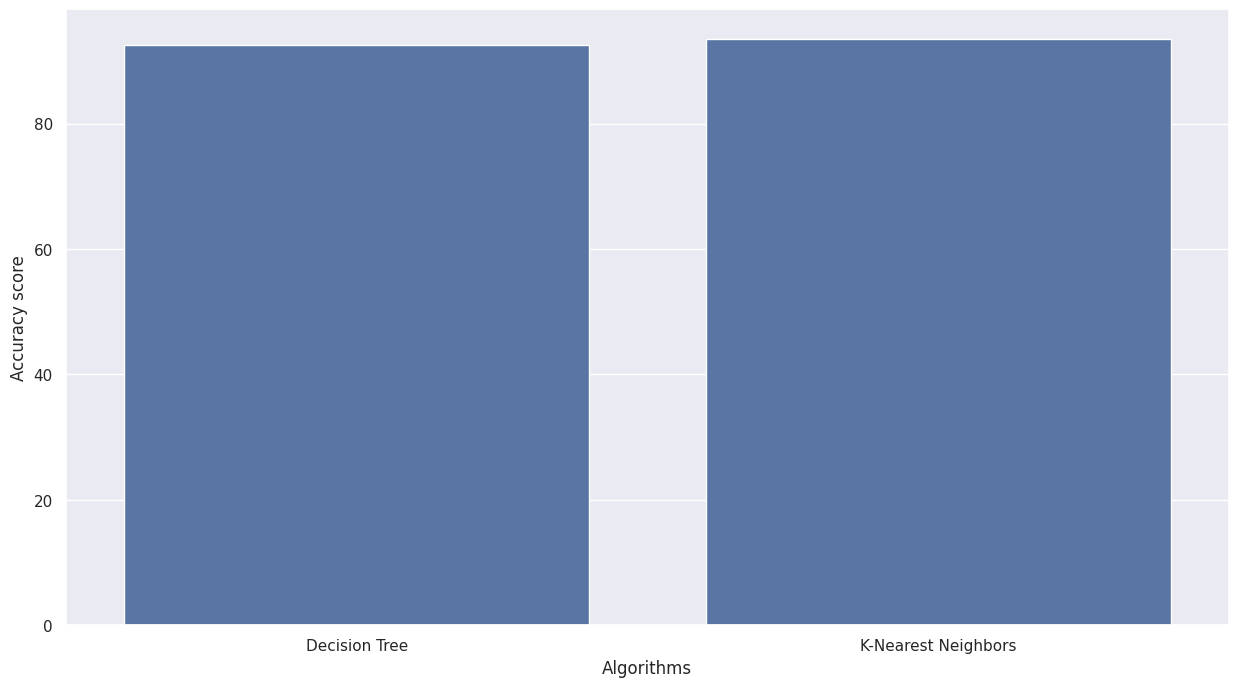

In [17]:
# Install the matplotlib module if necessary
!pip install matplotlib

# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Set the figure size
sns.set(rc={'figure.figsize':(15,8)})

# Set the x-axis label
plt.xlabel("Algorithms")

# Set the y-axis label
plt.ylabel("Accuracy score")

# Create a bar plot
sns.barplot(x=algorithms, y=scores)

The optimal k value is: 8


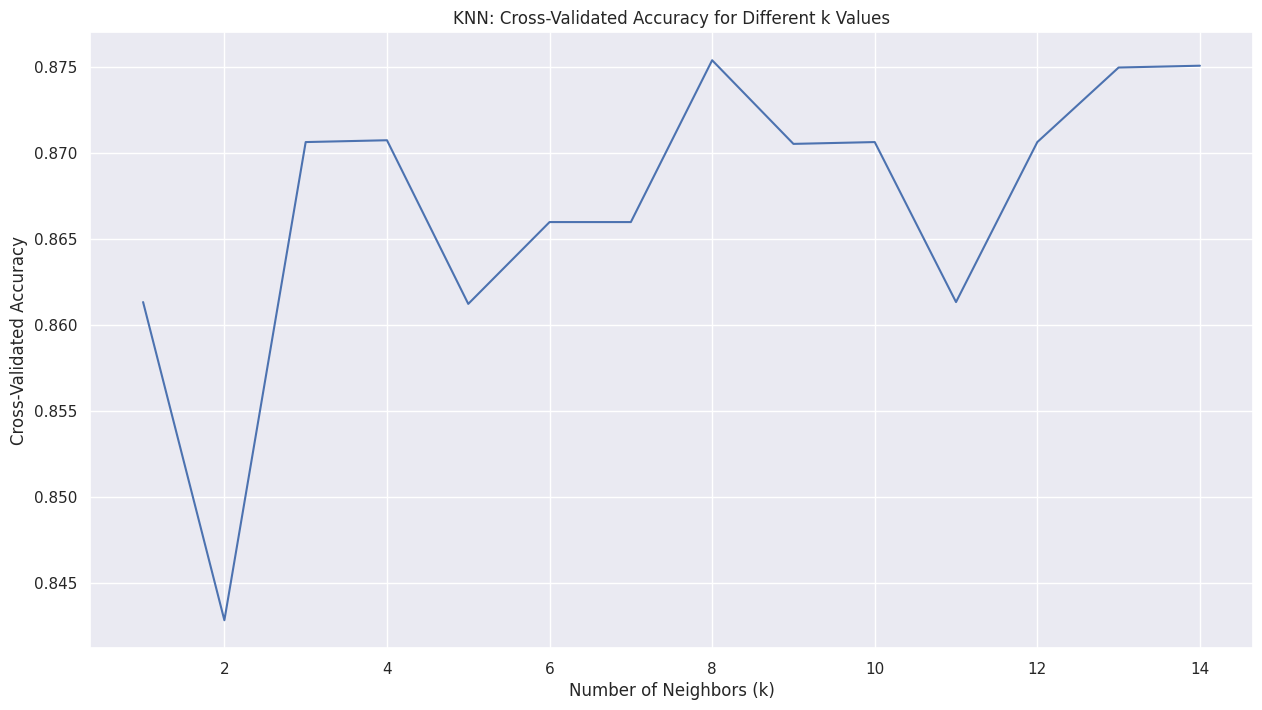

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming X_train and y_train are your training data and labels
# Perform cross-validation for different k values
k_values = list(range(1, 15))  # You can adjust the range based on your preference
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the optimal k value with the highest cross-validated accuracy
optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal k value is: {optimal_k}")

# Plotting the cross-validated accuracy for different k values (optional)
import matplotlib.pyplot as plt

plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN: Cross-Validated Accuracy for Different k Values')
plt.show()


In [21]:
import pandas as pd

# Load your dataset (replace with your actual data)
data = pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")

# Identify non-numeric columns
non_numeric_cols = data.select_dtypes(include=["object"]).columns

# Print non-numeric columns
print(f"Non-numeric columns: {non_numeric_cols}")

Non-numeric columns: Index(['GENDER', 'LUNG_RECRUITMENT'], dtype='object')


In [24]:

# Define accuracy as the evaluation metric
evaluation_metric = accuracy_score

# Set a range of neighbor values to iterate over
k_values = range(1, 21)  # Experiment with different starting/ending points


In [25]:

# Use KFold cross-validation for robust evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty lists to store results
k_vals = []
accuracy_scores = []

In [27]:
print(f"Size of X_train: {X_train.shape}")
print(f"Size of y_train: {y_train.shape}")

Size of X_train: (216, 15)
Size of y_train: (216,)


In [28]:
print(f"Unique values in y_train: {y_train.unique()}")

Unique values in y_train: ['YES' 'NO']


In [33]:
# Print accuracy for each iteration (k)
if accuracy_scores:
    print("Number of Neighbors (k) | Accuracy")
    for i in range(len(k_vals)):
        print(f"{k_vals[i]:>2} | {accuracy_scores[i]:.4f}")

In [35]:
print(accuracy_scores)

[]


In [36]:
# Find the iteration with the highest accuracy
best_k = k_vals[np.argmax(accuracy_scores)]
best_accuracy = np.max(accuracy_scores)

print(f"\nBest iteration (k): {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

ValueError: attempt to get argmax of an empty sequence

In [31]:
# Initialize lists to store results
k_vals = []
accuracy_scores = []

# Iterate over k values and calculate accuracy for each fold
for k in k_values:
    k_vals.append(k)
    fold_accuracies = []

    for train_index, test_index in cv.split(X_train):
        X_train_fold = pd.DataFrame(X_train.iloc[train_index])
        X_test_fold = pd.DataFrame(X_train.iloc[test_index])
        y_train_fold = pd.DataFrame(y_train.iloc[train_index])
        y_test_fold = pd.DataFrame(y_train.iloc[test_index])

        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(X_train_fold, y_train_fold)
        y_pred = knn_clf.predict(X_test_fold)

        fold_accuracies.append(evaluation_metric(y_test_fold, y_pred))

    avg_accuracy = np.mean(fold_accuracies)
    accuracy_scores.append(avg_accuracy)



AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [22]:




# Iterate over k values and calculate accuracy for each fold
for k in k_values:
    k_vals.append(k)
    fold_accuracies = []
    for train_index, test_index in cv.split(X_train):
        X_train_fold, X_test_fold, y_train_fold, y_test_fold = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(X_train_fold, y_train_fold)
        y_pred = knn_clf.predict(X_test_fold)
        fold_accuracies.append(evaluation_metric(y_test_fold, y_pred))
    avg_accuracy = np.mean(fold_accuracies)
    accuracy_scores.append(avg_accuracy)

# Print accuracy for each iteration (k)
print("Number of Neighbors (k) | Accuracy")
for i in range(len(k_vals)):
    print(f"{k_vals[i]:>2} | {accuracy_scores[i]:.4f}")

# Find the iteration with the highest accuracy
best_k = k_vals[accuracy_scores.index(max(accuracy_scores))]
best_accuracy = max(accuracy_scores)

print(f"\nBest iteration (k): {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

# Optional: Visualize results
import matplotlib.pyplot as plt
plt.plot(k_vals, accuracy_scores)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel(f"{evaluation_metric.__name__}")
plt.title(f"KNN Evaluation with {evaluation_metric.__name__}")
plt.show()


ValueError: could not convert string to float: 'M'